# Minimal Example
This notebook contains a minimal usage example of [Monte Carlo Contracts](https://github.com/luphord/monte-carlo-contracts).
A knockout option contract is defined, its underlying simulated, cashflows generated and plotted.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mcc import (
    Zero,
    One,
    When,
    At,
    Or,
    Until,
    Stock,
    Model,
    generate_simple_cashflows_in_numeraire_currency,
    evaluate,
)
from mcc.pricing_models.black_scholes import simulate_equity_black_scholes_model

### Define Knockout Option Contract

In [2]:
ko_option = Until(
    Stock("ABC Eqty") > 70,
    When(
        At(np.datetime64("2024-06-01")),
        Or(Stock("ABC Eqty") * One("USD") - 55 * One("USD"), Zero()),
    ),
)

### Simulate Model

In [3]:
spot = 60
volatility = 0.2
dategrid = np.array(
    [
        np.datetime64("2024-01-01"),
        np.datetime64("2024-02-01"),
        np.datetime64("2024-03-01"),
        np.datetime64("2024-04-01"),
        np.datetime64("2024-05-01"),
        np.datetime64("2024-06-01"),
    ]
)
n = 100
rnd = np.random.RandomState(123)

In [4]:
model = simulate_equity_black_scholes_model(
    "ABC Eqty", "USD", spot, dategrid, volatility, 0, n, rnd
)

### Generate Cashflows and Evaluation Option

In [5]:
cf = generate_simple_cashflows_in_numeraire_currency(model, ko_option)

In [6]:
evaluate(model, ko_option)

3.2316051920219797

### Plot Paths and Cashflows

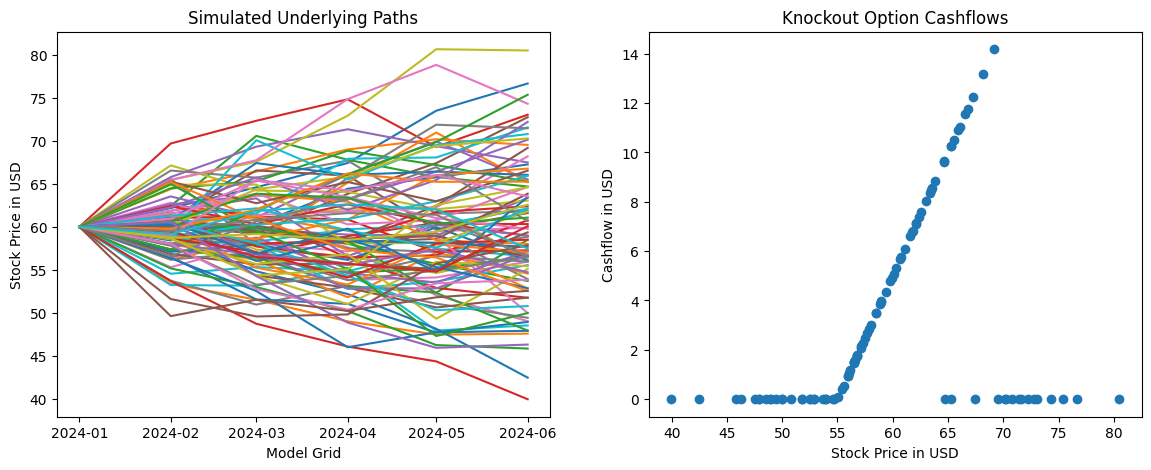

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(model.dategrid, model.simulated_stocks["ABC Eqty"].T)
ax[0].set_title("Simulated Underlying Paths")
ax[0].set_xlabel("Model Grid")
ax[0].set_ylabel("Stock Price in USD")
ax[1].scatter(model.simulated_stocks["ABC Eqty"][:, -1], cf)
ax[1].set_title("Knockout Option Cashflows")
ax[1].set_xlabel("Stock Price in USD")
ax[1].set_ylabel("Cashflow in USD");